# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts

I will create a likelihood function given data that we have observed (107+34 = 141 observations). With binary outcomes improved/not improved it is possible to create a likelihood funcction that follows a binomial distribution. Our prior will be beta(), with likelihood binomial(), and posterior with our conjugate prior beta() will also result in being a beta(). However, since I have used the uniform distribution, the posterior should closely follow the likelihood function (they'll have the same shape, and posterior will integrate to 1).


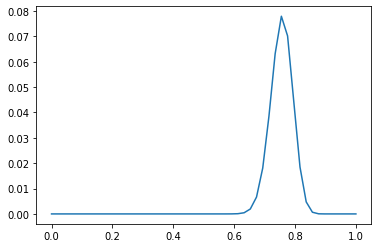

In [50]:
n = 141
x = 107

theta = np.linspace(0,1)
likelihood = sts.binom(x, n, theta)
plt.plot(theta, sts.binom.pmf(x, n, theta))
plt.show()

I have ussed beta(1,1), a uniform distribution, as this prior is based on ccomplete absense of prior knowledge about the subject.

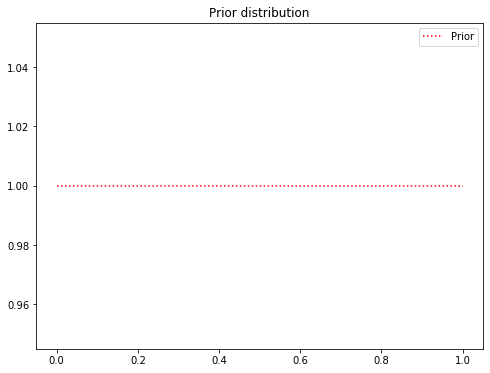

In [53]:
#plotting prior
a = 1
b = 1
prior = sts.beta(a, b)

plt.figure(figsize=(8,6))
plt.plot(theta, prior.pdf(theta), color="red", linestyle=":", label="Prior")
plt.title("Prior distribution")
plt.legend()
plt.show()

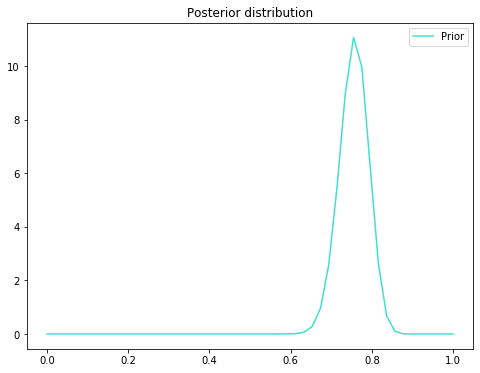

In [55]:
posterior = sts.beta(a+x, b+n-x)

plt.figure(figsize=(8,6))
plt.plot(theta, posterior.pdf(theta), color="turquoise", linestyle="-", label="Prior")
plt.title("Posterior distribution")
plt.legend()
plt.show()

I will get a posterior beta() distribution with parameters alpha = 108 and beta = 74.

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* $n \in \mathbb{N}_0$ – the number of trials
* $\alpha, \beta \in \mathbb{R}^+$ – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

$$p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}$$

where $B$ is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [36]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import beta as beta_function, comb
    return comb(n, k) * beta_function(k + alpha, n - k + beta) / beta_function(alpha, beta)

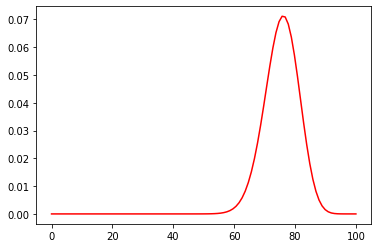

In [61]:
k = np.linspace(0, 100, 100)

plt.plot(k, beta_binomial_pmf(k, 100,a+x,b+n-x), color="red")
plt.show()

In [65]:
# at least 2/3
trials = 100
sum_list = []
for k in range(67, 101):
    sum_list.append(beta_binomial_pmf(k, trials, a+x, b+n-x))
print(sum(sum_list))

0.9411928617479145


In [67]:
# at least 3/4
trials = 100

sum_list_2 = []
for k in range(75, 101):
    sum_list_2.append(beta_binomial_pmf(k, trials, a+x, b+n-x))
print(sum(sum_list_2))

0.5861639755029541


We can see that the treatment works based on 2/3 people being treated well with a 94% certainty, while 3/4 with a 58% certainty; there are other variables to be taken into account (such as confounding variables related to patients - their ages, health conditions etc.) in order to evaluate the treatment more effectively. The "threshold" can also be setup to undertand these values better based on context (if the disease is rare, how easily does it get mitigated and treated etc.).